In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn import svm
from pylab import *
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


###### LINEAR REGRESSION

##### DATA

In [2]:
data = pd.read_csv('cost_revenue_clean.csv')
data

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527
...,...,...
5029,225000000,1519479547
5030,215000000,1671640593
5031,306000000,2058662225
5032,200000000,2207615668


In [3]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


#### VISUALIZE

(0.0, 450000000.0)

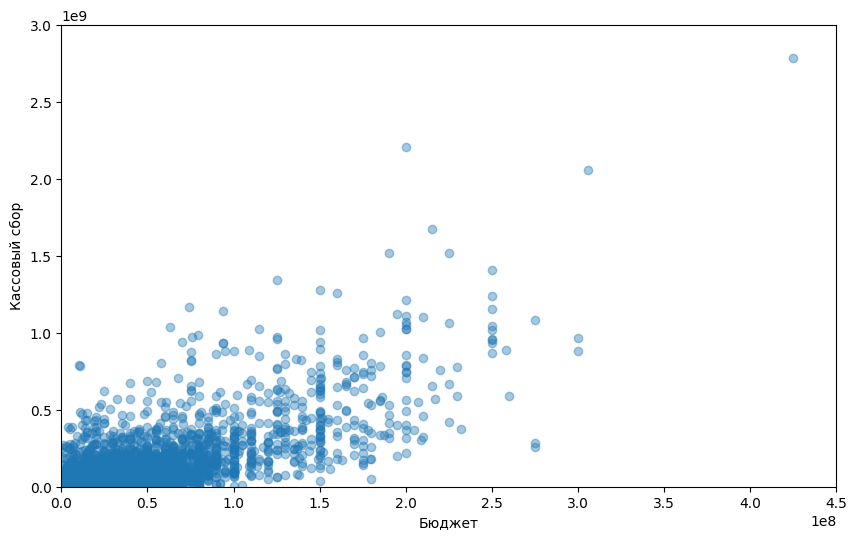

In [4]:
plt.figure(figsize =(10,6))


plt.scatter(data.production_budget_usd, data.worldwide_gross_usd, alpha=0.4)

plt.xlabel('Бюджет')
plt.ylabel('Кассовый сбор')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

#### MODEL

In [5]:
model = LinearRegression()

In [6]:
X = pd.DataFrame(data.production_budget_usd)
Y = pd.DataFrame(data.worldwide_gross_usd)

In [7]:
model.fit(X, Y)

LinearRegression()

In [8]:
model.coef_

array([[3.11150918]])

In [9]:
model.intercept_

array([-7236192.72913963])

(0.0, 450000000.0)

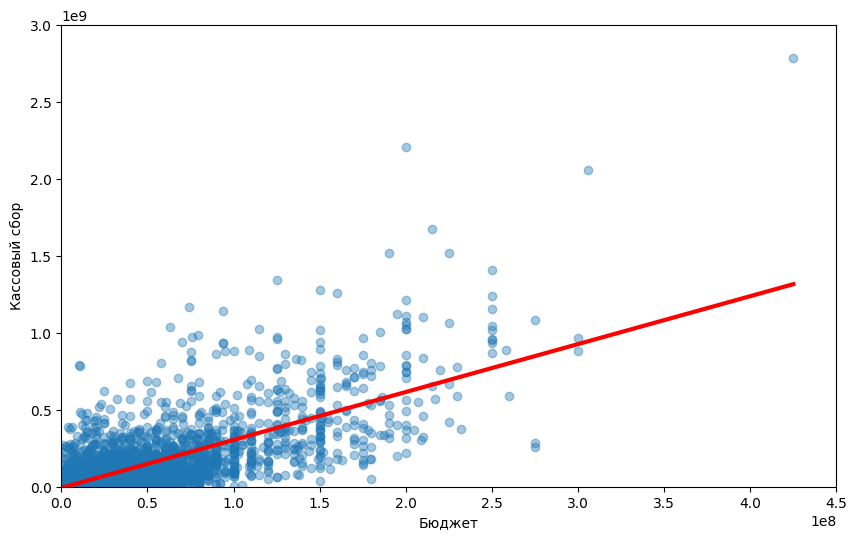

In [10]:
plt.figure(figsize =(10,6))


plt.scatter(data.production_budget_usd, data.worldwide_gross_usd, alpha=0.4)

plt.plot(X, model.predict(X), color = 'red', linewidth = 3)

plt.xlabel('Бюджет')
plt.ylabel('Кассовый сбор')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

In [11]:
model.score(X, Y)

0.5496485356985727

###### POLINOMIAL REGRESSION

### Количество отрицательных отзывов обратно зависит от среднего количества совершаемых покупок

In [12]:
np.random.seed(2)
purchases = np.random.normal(3.0, 1.0, 1000)
negatives = np.random.normal (10.0, 1.0, 1000) / purchases

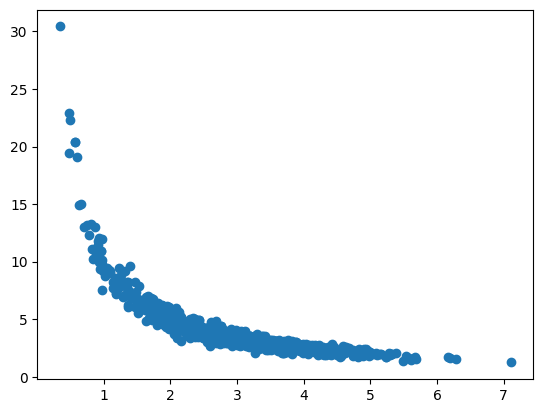

In [13]:
scatter(purchases, negatives)

### Переменные для обучения

In [14]:
x = np.array(purchases)
y = np.array(negatives)

### Полином степени 2 (парабола)

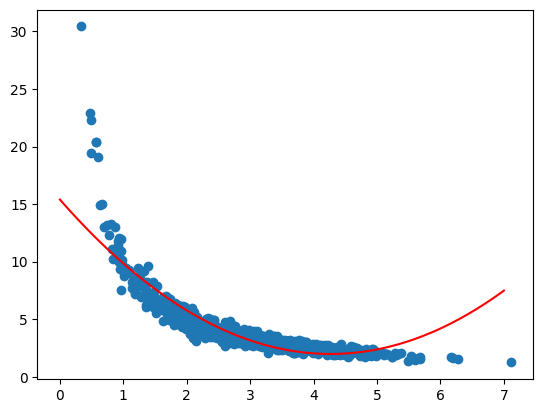

In [15]:
p2 = np.poly1d(np.polyfit(x,y,2))
xp = np.linspace(0,7,100)
plt.scatter(x,y)
plt.plot (xp, p2(xp), c='r')
plt.show()

### Получено приближение точек при помощи параболы (не точное)

In [16]:
r2 = r2_score(y, p2(x))
print (r2)

0.7804892408280977


### Полином степени 5

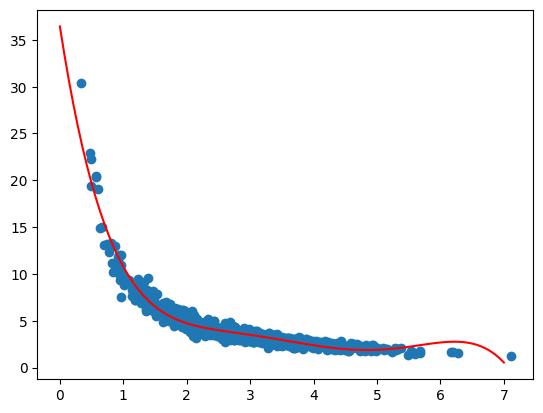

In [17]:
p5 = np.poly1d(np.polyfit(x,y,5))
xp = np.linspace(0,7,100)
plt.scatter(x,y)
plt.plot (xp, p5(xp), c='r')
plt.show()

In [18]:
r2 = r2_score(y, p5(x))
print(r2)

0.9448293121891197


### Полином степени 15 (переобучение, overfitting)

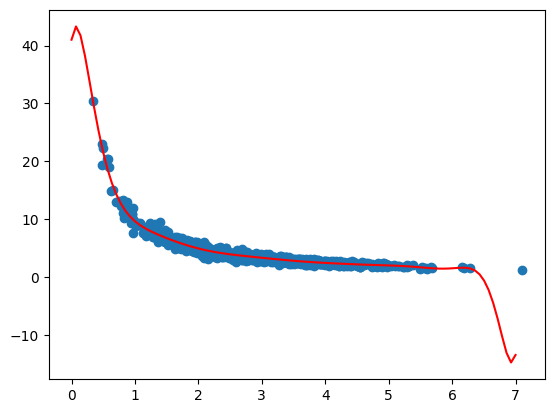

In [19]:
p15 = np.poly1d(np.polyfit(x,y,15))
xp = np.linspace(0,7,100)
plt.scatter(x,y)
plt.plot (xp, p15(xp), c='r')
plt.show()

In [20]:
r2 = r2_score(y, p15(x))
print(r2)

0.967041257563381


##### Логистическая регрессия для решеения задачи классификации 

In [21]:
# Источник https://www.youtube.com/watch?v=JK6TUkpBzP4



dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

ds = pd.read_csv(dataset_url,
                 names = [
                     'variance',
                     'skewness',
                     'curtosis',
                     'entropy',
                     'class',
                 ],
                )
ds

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### VISUALIZE

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random', 'power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


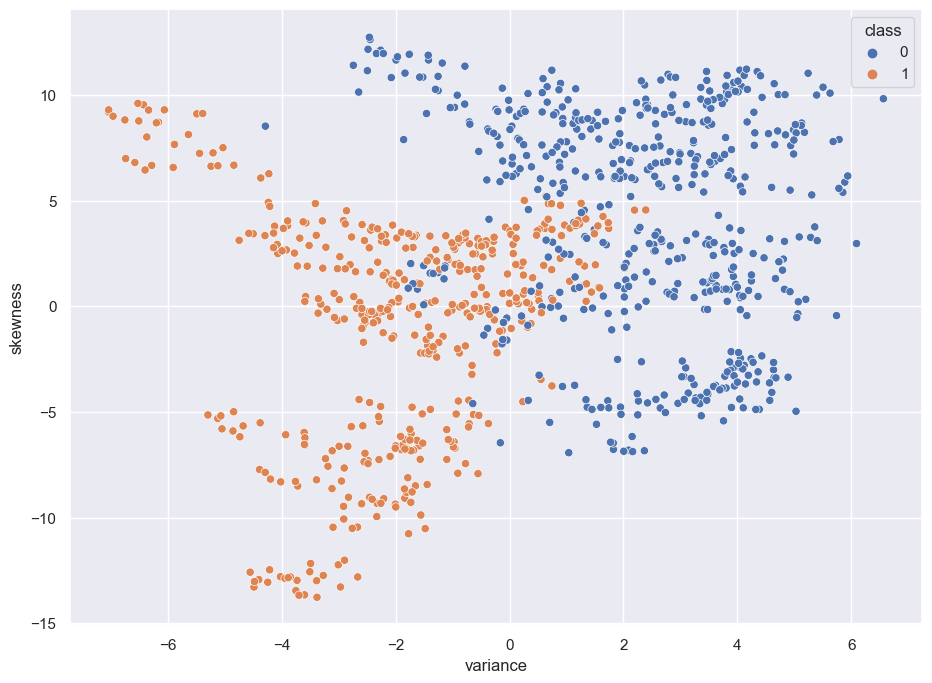

In [22]:
%pylab inline

sns.set(rc={'figure.figsize':(11,8)})

sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(1000));

### При выборе разных прямых, некоторые значения все равно будут попадать не в свой класс - это потери. Попробуем минимизировать их. Для этого придется подобрать наилучший коэффициент наклона этой прямой

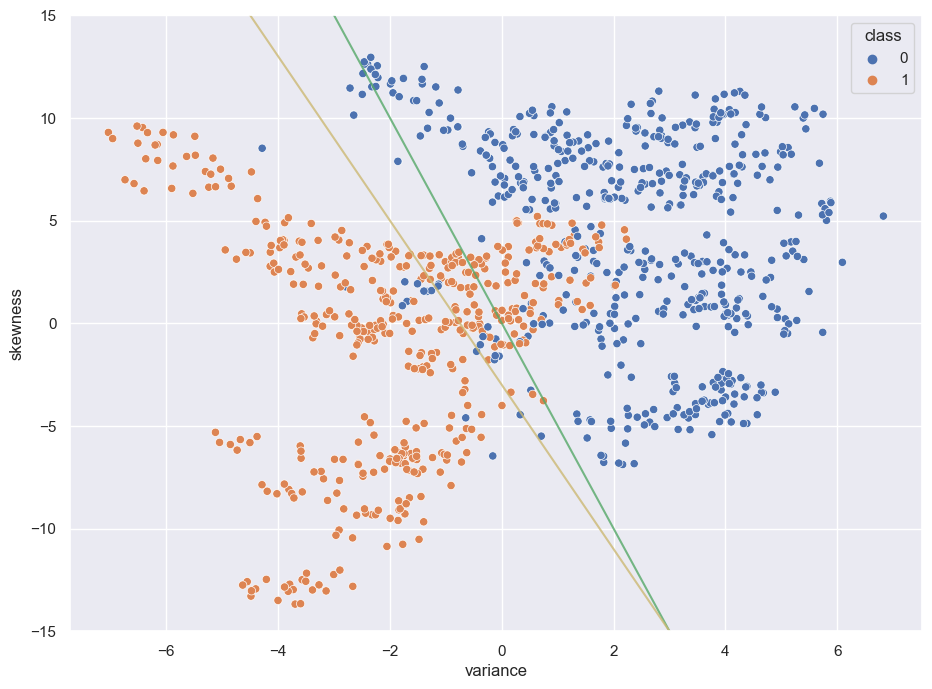

In [23]:
sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(1000));

lines = [([0, -5], 'g'),
         ([-3, -4], 'y')]

for line in lines:
    x = np.linspace(-6, 6, 100)
    y = line[0][0] + x*line[0][1]
    plt.plot(x, y, color=line[1], alpha=0.8)
plt.ylim((-15, 15));

### Оценим точность модели

In [24]:
acc = []
for line in lines:
    pred = ds['skewness'] - line[0][1]*ds['variance'] - line[0][0] < 0
    acc.append(accuracy_score(ds['class'], pred))

print(f"Точность для зеленой прямой: {acc[0]:.3}")
print(f"Точность для желтой прямой: {acc[1]:.3}")

Точность для зеленой прямой: 0.873
Точность для желтой прямой: 0.848


In [25]:
def logloss(theta, x, y):
    n = len(y)
    def sigma(z):
        return 1/(1 + np.exp(-z))
    return -1/n*np.sum(y*np.log(sigma(theta*x)) + (1-y)*np.log(1 - sigma(theta*x)))

C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


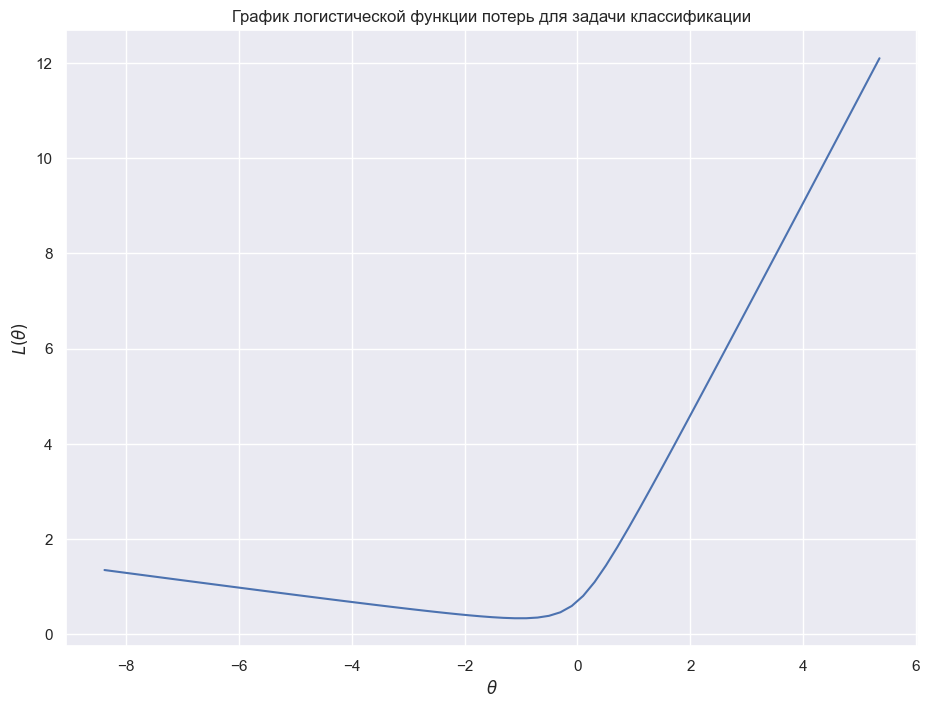

In [26]:
x = ds['variance']
y = ds['class']

theta = np.linspace(-10, 10, 100)
L = [logloss(th, x, y) for th in theta]
plt.plot(theta, L)
plt.xlabel('$\\theta$')
plt.ylabel('$L(\\theta)$')
plt.title('График логистической функции потерь для задачи классификации');

###### Метод градиентного спуска

In [27]:
def sigma(z):
    return 1/(1+np.exp(-z))

def grad(y, X, theta):
    n = y.shape[0]
    return 1/n * X.transpose() @ (sigma(X @ theta) - y)

def L(y, X, theta):
    n = y.shape[0]
    return -1/(n)*np.sum(y*np.log(sigma(X @ theta)) + (1 - y)*np.log(1 - sigma(X @ theta)))

def fit(y, X, theta_0, alpha=0.001, nsteps = 100):
    theta = np.copy(theta_0)
    loss = [L(y, X, theta)]
    for i in range(nsteps):
        theta -= alpha*grad(y, X, theta)
        loss.append(L(y, X, theta))
    return loss, theta

### Предобработка данных 

Для лучшей сходимости метода проведем нормализацию признаков.

In [28]:
X = ds[['variance', 'skewness']]
y = ds['class']

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

norm_X = (X - X_mean)/X_std

In [29]:
n = len(X)
X = np.hstack((np.ones((n, 1)), norm_X))
m = 2
theta_0 = np.zeros(m + 1)
loss_history, theta_star = fit(y, X, theta_0, alpha=1e-2, nsteps=5000)

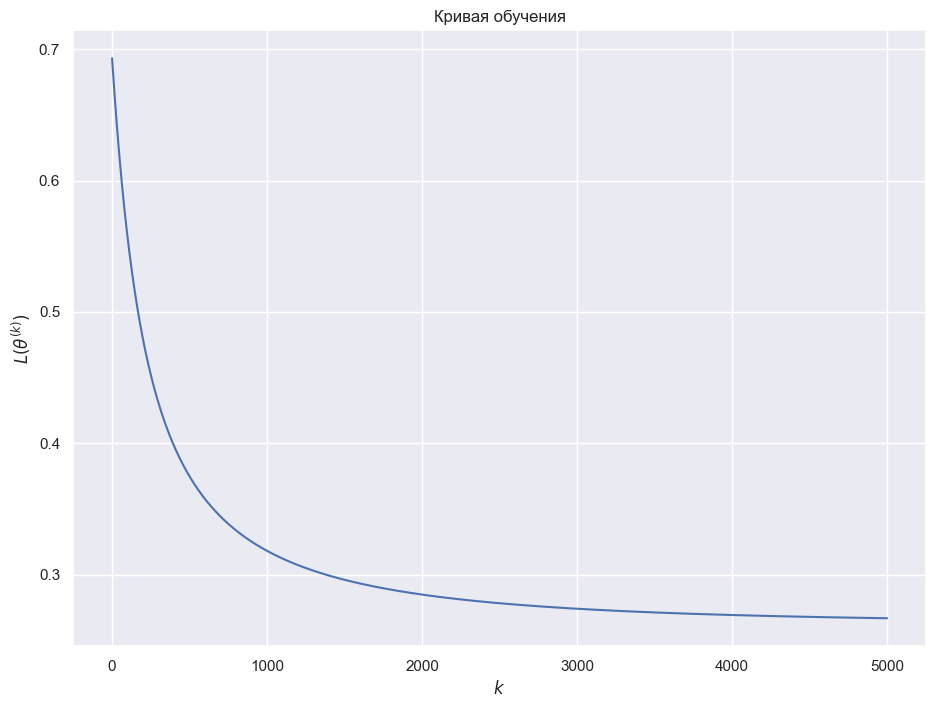

In [30]:
plt.plot(loss_history)
plt.xlabel('$k$')
plt.ylabel('$L(\\theta^{(k)})$')
plt.title('Кривая обучения');

### Построим получившуюся разделяющую гиперплоскость с параметрами ![image.png](attachment:image.png)

In [31]:
theta_star

array([-0.37417584, -2.64253207, -1.34393351])

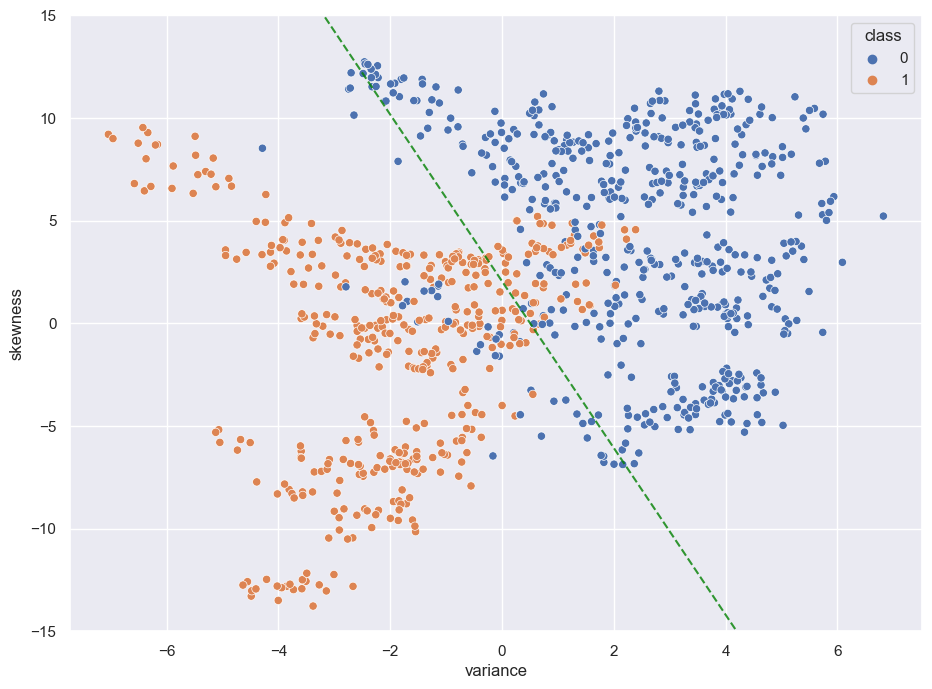

In [32]:
sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(1000));

x_tmp = np.linspace(-6, 6, 100)
y_tmp = - (theta_star[0] + (x_tmp - X_mean[0])/X_std[0]*theta_star[1])/theta_star[2]

plt.plot(x_tmp, X_std[1]*y_tmp + X_mean[1] , color="green", alpha=0.8, linestyle='--')
plt.ylim((-15, 15));

### Вычислим точность

In [33]:
y_pred = X @ theta_star > 0
logreg_score = accuracy_score(y, y_pred)
print(f'Logistic Regression accuracy: {logreg_score:.3f}')

Logistic Regression accuracy: 0.887


### В некоторых задачах требуется нелинейная разделяющая поверхность. Рассмотрим следующий набор данных тестов микропроцессоров.

In [34]:
microchip = pd.read_csv(
    'microchip_test.csv',
    names=['Test1', 'Test2', 'Passed'],
)

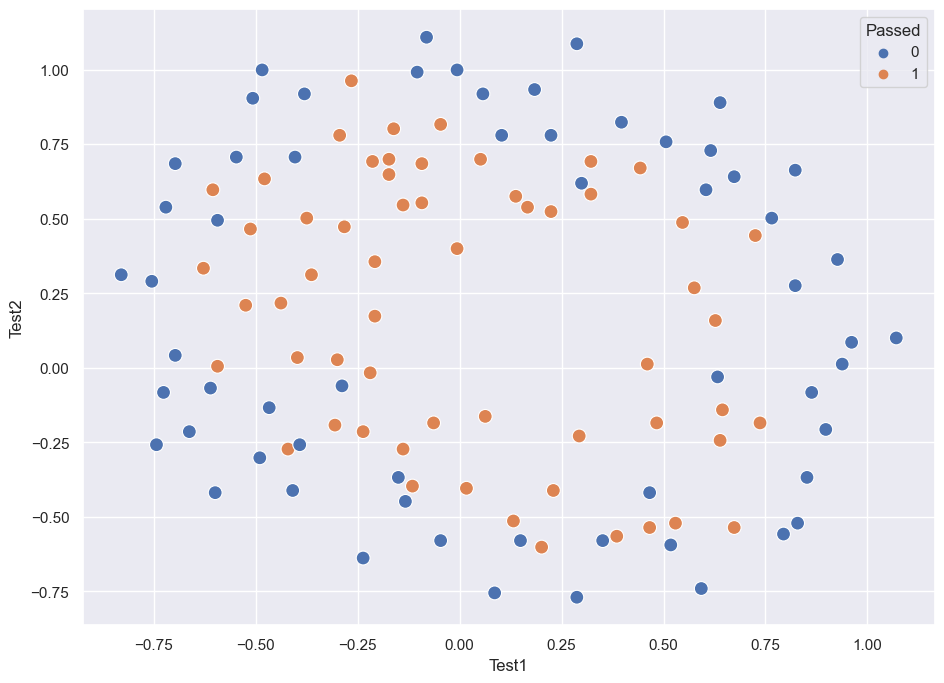

In [35]:
sns.scatterplot(x='Test1', y='Test2', hue='Passed', data=microchip, s=100);

### На рисунке хорошо видно, что разделяющая граница должна иметь нелинейный вид. Попробуем добавить квадратичные признаки в наш набор данных. ![image.png](attachment:image.png)

In [36]:
n = len(microchip)
m = 2
tmpX = np.ones((n, m))
X = np.zeros((n, 2*(m+1)))
tmpX[:] = microchip[['Test1', 'Test2']]
for i in range(n):
    X[i, :] = np.array([1, tmpX[i, 0], tmpX[i, 1], tmpX[i, 0]**2, tmpX[i, 0]*tmpX[i, 1], tmpX[i, 1]**2])
y = microchip['Passed'].values

In [37]:

theta_0 = np.zeros(2*(m+1))
loss_history, theta_star = fit(y, X, theta_0, alpha=1e-1, nsteps=20000)

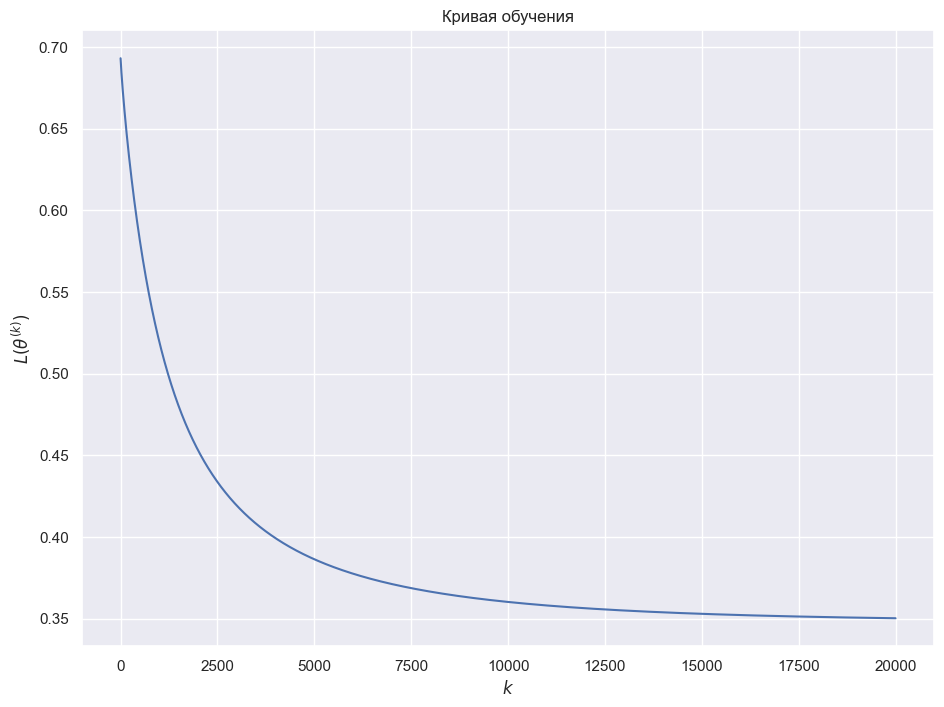

In [38]:
plt.plot(loss_history)
plt.xlabel('$k$')
plt.ylabel('$L(\\theta^{(k)})$')
plt.title('Кривая обучения');

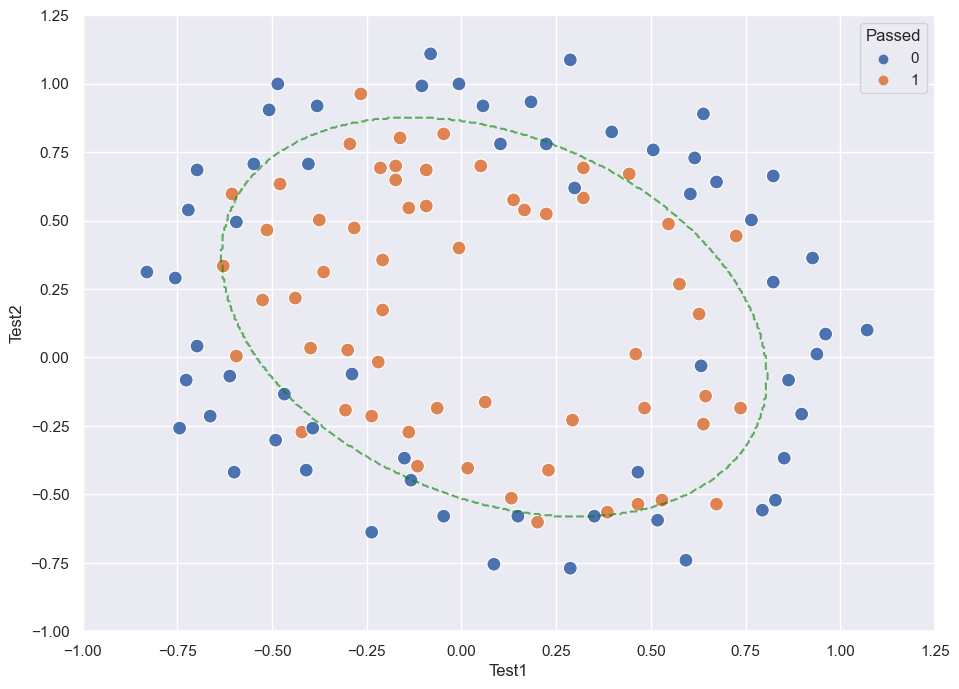

In [39]:
import warnings
warnings.filterwarnings('ignore')
npoints = 500
x1 = np.linspace(-1.0, 1.25, npoints)
x2 = np.linspace(-1.0, 1.25, npoints)
xx1, xx2 = np.meshgrid(x1, x2)

def decision_func(x, theta):
    return theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[0]**2 + theta[4]*x[0]*x[1] + theta[5]*x[1]**2

points = np.c_[xx1.ravel(), xx2.ravel()]
Z = np.array([1 if decision_func(x, theta_star) > 0 else 0 for x in points])
Z = Z.reshape(xx1.shape)

sns.scatterplot(x='Test1', y='Test2', hue='Passed', data=microchip, s=100);
plt.contour(xx1, xx2, Z, levels=[0], colors='green', alpha=0.6, linestyles='--');

In [40]:
y_pred = X @ theta_star > 0
logreg_score = accuracy_score(y, y_pred)
print(f'Logistic Regression accuracy: {logreg_score:.3f}')

Logistic Regression accuracy: 0.856


###### МЕТОД ОПОРНЫХ ВЕКТОРОВ SVM

In [41]:
# Источник https://www.youtube.com/watch?v=PDCLoE-xOWM

x_train = ds[['variance', 'skewness', 'curtosis', 'entropy']]
y_train = ds['class']

In [42]:
clf = svm.SVC(kernel='linear')  # SVM с линейным ядром
clf.fit(x_train, y_train)  # нахождение вектора w по обучающей выборке
y_pr = clf.predict(x_train)  # проверка на обучающей выборке
print(np.array(y_train) - np.array(y_pr))  # нули - без ошибок; иначе - ошибка


np.set_printoptions(threshold=sys.maxsize)
lin_clf = svm.LinearSVC()           # SVM для линейно разделимой выборки (используется для получения вектора w)
lin_clf.fit(x_train, y_train)       # нахождение вектора w по обучающей выборке

[0 0 0 ... 0 0 0]


LinearSVC()

In [43]:
v = clf.support_vectors_  # выделение опорных векторов
w = lin_clf.coef_[0]                # коэффициенты линейной модели
print(w, v, sep='\n')

[-1.82830899 -1.00950403 -1.25136211 -0.13440376]
[[ 3.29240e-01 -4.45520e+00  4.57180e+00 -9.88800e-01]
 [ 3.29200e-01 -4.45520e+00  4.57180e+00 -9.88800e-01]
 [-7.86900e-01  9.56630e+00 -3.78670e+00 -7.50340e+00]
 [-7.86900e-01  9.56630e+00 -3.78670e+00 -7.50340e+00]
 [-1.85840e+00  7.88600e+00 -1.66430e+00 -1.83840e+00]
 [ 5.19500e-01 -3.26330e+00  3.08950e+00 -9.84900e-01]
 [ 5.70600e-01 -2.48000e-02  1.24210e+00 -5.62100e-01]
 [-1.85840e+00  7.88600e+00 -1.66430e+00 -1.83840e+00]
 [ 3.79800e-01  7.09800e-01  7.57200e-01 -4.44400e-01]
 [ 3.29200e-01 -4.45520e+00  4.57180e+00 -9.88800e-01]
 [ 3.29200e-01 -4.45520e+00  4.57180e+00 -9.88800e-01]
 [ 5.19500e-01 -3.26330e+00  3.08950e+00 -9.84900e-01]
 [-1.85840e+00  7.88600e+00 -1.66430e+00 -1.83840e+00]
 [ 5.19500e-01 -3.26330e+00  3.08950e+00 -9.84900e-01]
 [ 3.29200e-01 -4.45520e+00  4.57180e+00 -9.88800e-01]
 [ 3.79800e-01  7.09800e-01  7.57200e-01 -4.44400e-01]
 [ 3.79800e-01  7.09800e-01  7.57200e-01 -4.44400e-01]
 [ 3.79800e-01 

In [44]:
# Формирование графиков
x_train = np.array(x_train)
y_train = np.array(y_train)

x_max = int(max(x_train[:, 0]))
x_min = int(min(x_train[:, 0]))

# line_x = list(range(int(max(x_train[:, 0]))))    # формирование графика разделяющей линии

line_x = list(range(x_min, x_max))

line_y = [-x*w[0]/w[1] - w[2] for x in line_x]


print (line_x, line_y)

# print (range(int(max(x_train[:, 0]))))

# print (x_train)

[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5] [13.929036057028163, 12.117939779521533, 10.306843502014903, 8.495747224508275, 6.684650947001644, 4.8735546694950145, 3.0624583919883843, 1.2513621144817542, -0.5597341630248758, -2.3708304405315057, -4.181926718038135, -5.993022995544766, -7.804119273051395]


In [45]:
x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == 0]  # и 2-го классов

In [46]:
# plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
# plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
# plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')

# plt.xlim([-10, 10])
# plt.ylim([-15, 15])
# plt.ylabel("длина")
# plt.xlabel("ширина")
# plt.grid(True)
# plt.show()

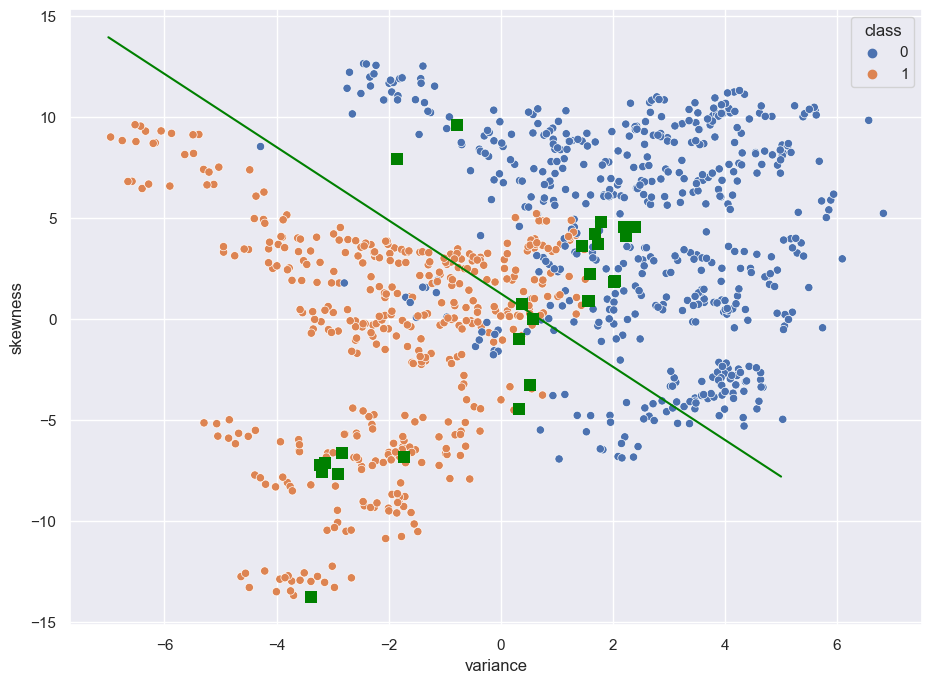

In [47]:
sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(1000));
plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s', color='green')
plt.plot(line_x, line_y, color='green')

### Дерево Решений

In [48]:
X = ds.loc[:, 'variance':'entropy'] # Первое двоеточие - все строки в наборе данных. 
                                          #Второе - все столбцы от variance до entropy 
Y = ds['class']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)
# Разделили датасет 
clf = DecisionTreeClassifier()
# Создали классификатор
clf = clf.fit(X_train, Y_train)
# Обучили модель
y_pred = clf.predict(X_test)
# Предсказали значение
print (y_pred)

[1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1]


In [50]:
# Просмотрим точность модели
print ("Accuracy on training set: {:.3f}".format(clf.score(X_train, Y_train)))
print ("Accuracy on test set: {:.3f}".format(clf.score(X_test, Y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.990


In [ ]:

fn=['variance', 'skewness', 'curtosis', 'entropy']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)



In [ ]:
print ('variance = ', clf.feature_importances_[0], 'skewness = ', clf.feature_importances_[1], 
       'curtosis = ', clf.feature_importances_[2], 'entropy = ', clf.feature_importances_[3])

In [ ]:
# plt.grid(clf.feature_importances_)

sns_plot = sns.distplot(clf.feature_importances_)
fig = sns_plot.get_figure()

# d = pd.DataFrame({'variance': [clf.feature_importances_[0]], 'skewness': [clf.feature_importances_[1]], 
#        'curtosis':[clf.feature_importances_[2]], 'entropy': [clf.feature_importances_[3]]})

# d = pd.DataFrame({'Columns': ['variance', 'skewness', 'curtosis', 'entropy'], 'importance': clf.feature_importances_})


# #view first 4 rows of DataFrame
# d.head ()

# d.hist (column = 'Columns')